In [12]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, learning_curve, validation_curve, ShuffleSplit, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from IPython.display import display

# Definitions
pd.set_option('display.float_format', lambda x: '%.3f' % x)
%matplotlib inline
njobs = 4
randomState = 0

In [2]:
# Load preprocessed data
data = pd.read_csv("cleanData/data.csv")
y = pd.read_csv("cleanData/y.csv", header = None)
y = y[0]

X_train, X_test, y_train, y_test = train_test_split(data, y, test_size = 0.25, random_state = randomState)

In [8]:
# Testing accuracy as a function of n_neighbors and weights
scores_dis = []
scores_uni = []
param_range = [2, 3, 4, 5, 10, 15, 20, 30, 50]
for x in param_range:
    print("x = " + str(x))
    knn = KNeighborsClassifier(n_neighbors = x,
                               weights = "distance", 
                               n_jobs = njobs)
    knn.fit(X_train, y_train)
    score = knn.score(X_test, y_test)
    scores_dis.append(score)
    knn = KNeighborsClassifier(n_neighbors = x,
                               weights = "uniform", 
                               n_jobs = njobs)
    knn.fit(X_train, y_train)
    score = knn.score(X_test, y_test)
    scores_uni.append(score)

x = 2
x = 3
x = 4
x = 5
x = 10
x = 15
x = 20
x = 30
x = 50


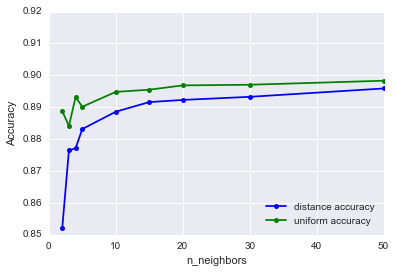

In [9]:
plt.plot(param_range, scores_dis, color = "blue", marker = "o", markersize = 5, label = "distance accuracy")
plt.plot(param_range, scores_uni, color = "green", marker = "o", markersize = 5, label = "uniform accuracy")
plt.xlabel("n_neighbors")
plt.ylabel("Accuracy")
plt.legend(loc = "lower right")
plt.ylim([0.85, 0.92])
plt.show()

In [ ]:
print("Using a uniform weighting strategy gives better accuracy than distance weighting, no matter how many neighbors we use")
print("The more neighbors we use the better results are, but to save time we will settle on 20")

In [10]:
print("Accuracy with best settings : " + str(scores_uni[8]))

Accuracy with best settings : 0.898319899


In [11]:
print("Accuracy is similar to the other models tested so far")

Accuracy is similar to the other models tested so far
